In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image
print(os.listdir("./common/data"))

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

['chest_xray', 'resampled', 'TEST']


Using TensorFlow backend.


# Resample Data Into New Dataset

# Resample Train Data

In [7]:
from common.src import resample as res

In [8]:
from imblearn.under_sampling import ClusterCentroids

path = r'C:\Users\mmitk\dev\2020\pneumonia\common\data\chest_xray\train'
cc = ClusterCentroids()

In [9]:
res.resample_directory(cc, path, 'ClustCent', val = False)

# Load Data

In [10]:
train_folder= './common/data/resampled/ClustCent/train'
val_folder = './common/data/chest_xray/val/'
test_folder = './common/data/chest_xray/test/'

In [11]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

In [12]:
from common.src import util

train_datagen = util.create_train_datagen()
test_datagen = util.create_test_datagen()

training_set = util.create_generator_set(train_datagen, './common/data/resampled/ClustCent/train')
validation_generator = util.create_generator_set(test_datagen, './common/data/chest_xray/val/')
test_set = util.create_generator_set(test_datagen, './common/data/chest_xray/test/') 

Found 2682 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Create Model

In [13]:
from common.src import models

cnn20 = models.CNNModel()
cnn20.create_model()
cnn20.summary()

# Fit Model

In [15]:
cnn_model = cnn20.fit_generator(training_set, validation_generator, epochs=20)

Epoch 1/20
163/163 [==============================] - 134s 824ms/step - loss: 0.4107 - tp: 4191.0000 - fp: 1047.0000 - tn: 4163.0000 - fn: 1019.0000 - accuracy: 0.8017 - precision: 0.8001 - recall: 0.8044 - auc: 0.8969 - val_loss: 0.2863 - val_tp: 9984.0000 - val_fp: 0.0000e+00 - val_tn: 9984.0000 - val_fn: 0.0000e+00 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - val_auc: 1.0000
Epoch 2/20
163/163 [==============================] - 134s 820ms/step - loss: 0.2606 - tp: 4653.0000 - fp: 542.0000 - tn: 4656.0000 - fn: 545.0000 - accuracy: 0.8954 - precision: 0.8957 - recall: 0.8952 - auc: 0.9585 - val_loss: 0.5494 - val_tp: 7488.0000 - val_fp: 2496.0000 - val_tn: 7488.0000 - val_fn: 2496.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.8320
Epoch 3/20
163/163 [==============================] - 133s 817ms/step - loss: 0.2204 - tp: 4761.0000 - fp: 464.0000 - tn: 4740.0000 - fn: 443.0000 - accuracy: 0.9129 - precision: 0.9112 - reca

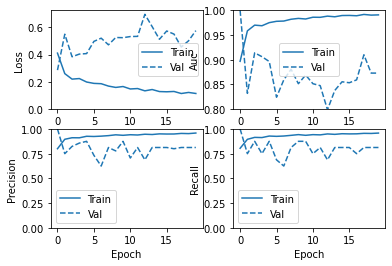

In [16]:
cnn20.plot_history()

In [17]:
cnn20.get_classification_report(test_set)

              precision    recall  f1-score   support

      NORMAL       0.32      0.32      0.32       234
   PNEUMONIA       0.59      0.58      0.58       390

    accuracy                           0.48       624
   macro avg       0.45      0.45      0.45       624
weighted avg       0.49      0.48      0.48       624



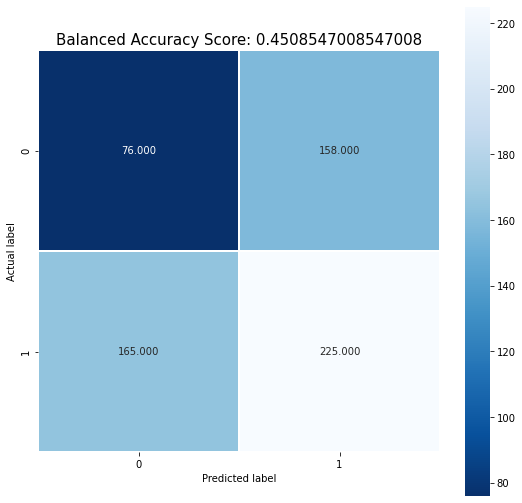

In [18]:
cnn20.display_confusion_matrix(test_set)